In [ ]:
'pip install dask[dataframe]'

# Install XGBoost
'pip install xgboost'

'pip install joblib flask'

'pip install joblib flask'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import joblib
import pickle

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Network_anomaly_data.csv'

data = pd.read_csv(file_path)

In [ ]:
data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

Basic Information: The dataset contains 43 columns, each corresponding to a different feature related to network traffic. There are 125973 rows in total.


In [ ]:
df = data.copy()

In [ ]:
data.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


Distribution of Key Features:

The distributions of Src_bytes, Dst_bytes, Duration, Count, and Srv_count reveal the following: Src_bytes and Dst_bytes have right-skewed distributions, indicating a small number of very high byte-transfer instances. Duration also shows a skewed distribution, with most connections being short in duration, but a few are much longer. Count and Srv_count (time-related features) demonstrate similar patterns, suggesting bursts of activity to specific services or hosts.

Only the Num_outbound_cmds column contains missing values. The entire column has zero variance, meaning it contains only NaN values or a constant, indicating it may not be useful for modeling. Further investigation is required, but it may be feasible to drop this column.

In [ ]:
# Define columns for categorical conversion
categorical_features = [
    'protocoltype', 'service', 'flag', 'land', 'loggedin', 'rootshell',
    'suattempted', 'ishostlogin', 'isguestlogin', 'attack'
]

# Convert categorical features to 'category' data type
for feature in categorical_features:
    if feature in data.columns:
        data[feature] = data[feature].astype('category')

# Check updated data types
updated_dtypes = data.dtypes
print(updated_dtypes)

duration                     int64
protocoltype              category
service                   category
flag                      category
srcbytes                     int64
dstbytes                     int64
land                      category
wrongfragment                int64
urgent                       int64
hot                          int64
numfailedlogins              int64
loggedin                  category
numcompromised               int64
rootshell                 category
suattempted               category
numroot                      int64
numfilecreations             int64
numshells                    int64
numaccessfiles               int64
numoutboundcmds              int64
ishostlogin               category
isguestlogin              category
count                        int64
srvcount                     int64
serrorrate                 float64
srvserrorrate              float64
rerrorrate                 float64
srvrerrorrate              float64
samesrvrate         

Confirm Consistent Naming:
The feature names in the dataset (protocoltype, service, flag, etc.) are not identical to the ones in our initial conversion list. We should ensure consistency across feature names to avoid missing any fields.

Convert Binary and Boolean Features:
Features like land, loggedin, rootshell, suattempted, ishostlogin, and isguestlogin could be converted to category as well since they represent binary states. Convert Categorical Object Types: The columns protocoltype, service, flag, and attack should also be converted to category for efficient memory use and ease of analysis.

In [ ]:
# Summary of numerical features
numerical_summary = data.describe()

print("Numerical Summary:\n", numerical_summary)

Numerical Summary:
            duration      srcbytes      dstbytes  wrongfragment         urgent  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.022687       0.000111   
std      2604.51531  5.870331e+06  4.021269e+06       0.253530       0.014366   
min         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       3.000000       3.000000   

                 hot  numfailedlogins  numcompromised        numroot  \
count  125973.000000    125973.000000   125973.000000  125973.000000   
mean        0.204409         0.001222        0.279250       0.302192   
std         2.149968         0.045

Numerical Summary:

The srcbytes, dstbytes, and duration columns show a highly skewed distribution with extreme values, indicating potential outliers.

For example:

srcbytes ranges from 0 to 1.38 billion, with a mean of approximately 45,566 and a standard deviation of over 5.87 million. dstbytes ranges from 0 to 1.31 billion, with similar skewness. duration has a maximum of 42,908 seconds, but the mean is only 287 seconds, showing a strong right skew. Insight: The extreme values suggest the presence of outliers or possibly anomalous data points, which could be critical for anomaly detection.

In [ ]:
# Summary of categorical features
categorical_summary = data.describe(include='category')

print("\nCategorical Summary:\n", categorical_summary)


Categorical Summary:
        protocoltype service    flag    land  loggedin  rootshell  suattempted  \
count        125973  125973  125973  125973    125973     125973       125973   
unique            3      70      11       2         2          2            3   
top             tcp    http      SF       0         0          0            0   
freq         102689   40338   74945  125948     76121     125804       125893   

        ishostlogin  isguestlogin  attack  
count        125973        125973  125973  
unique            2             2      23  
top               0             0  normal  
freq         125972        124786   67343  


Categorical Summary:

The protocoltype, service, and flag columns contain multiple unique values:

protocoltype has 3 unique values with tcp being the most frequent. service has 70 unique values, with http as the most common. flag has 11 unique values, with SF as the top category. Insight: The diversity in categorical values can add rich information to the anomaly detection model, as certain combinations of protocol, service, and flag may correlate with anomalies.

# **Hypothesis Testing**

In [ ]:
# Separate data into normal and anomalous based on 'attack' column
normal_data = data[data['attack'] == 0]
anomalous_data = data[data['attack'] == 1]

In [ ]:
from scipy.stats import chi2_contingency

# Cross-tabulation for protocol type
protocol_table = pd.crosstab(data['protocoltype'], data['attack'])
chi2, p, dof, ex = chi2_contingency(protocol_table)
print("Chi-square test for Protocol_type:", chi2, "p-value:", p)

Chi-square test for Protocol_type: 110962.04754876824 p-value: 0.0


The chi-square test for protocol_type shows a very high chi-square value (110,962) and a p-value of 0.0, indicating a strong association between protocol_type and attack. This suggests that certain protocols are likely correlated with attack presence, making protocol_type a significant feature for anomaly detection.

In [ ]:
# Cross-tabulation for service
service_table = pd.crosstab(data['service'], data['attack'])
chi2, p, dof, ex = chi2_contingency(service_table)
print("Chi-square test for Service:", chi2, "p-value:", p)

Chi-square test for Service: 350657.88534601394 p-value: 0.0


The chi-square test for service yields a high chi-square value (350,657) and a p-value of 0.0, indicating a strong association between service type and attack. This suggests that specific services are highly correlated with attack occurrences, making service a key feature for detecting anomalies.

In [ ]:
# Create contingency table for flag and Attack
connection_attack_ct = pd.crosstab(data['flag'], data['attack'])

# Perform Chi-square test
chi2, p, dof, ex = chi2_contingency(connection_attack_ct)
print("Chi-square test for flag and Attack:")
print("Chi2 Statistic:", chi2, "p-value:", p)

Chi-square test for flag and Attack:
Chi2 Statistic: 238052.84577002664 p-value: 0.0


The chi-square test for flag and attack results in a high chi-square statistic (238,052) with a p-value of 0.0, indicating a strong association between connection flag statuses and attack presence. This suggests that certain flag values are closely linked to attacks, making flag an important feature for identifying anomalous activity.

# **Distribution**

In [ ]:
# Count of each category in 'attack' (target variable)
attack_distribution = data['attack'].value_counts()

print("Attack Distribution:\n", attack_distribution)

Attack Distribution:
 attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


Attack Distribution:

The attack variable is highly imbalanced:

normal entries make up the majority, with 67,343 occurrences. Several types of attacks like neptune, satan, and ipsweep are frequent, while others (e.g., spy, perl) are rare. Insight: This imbalance will need to be addressed during model training, possibly through resampling techniques or by focusing on metrics like precision and recall for the anomaly classes.

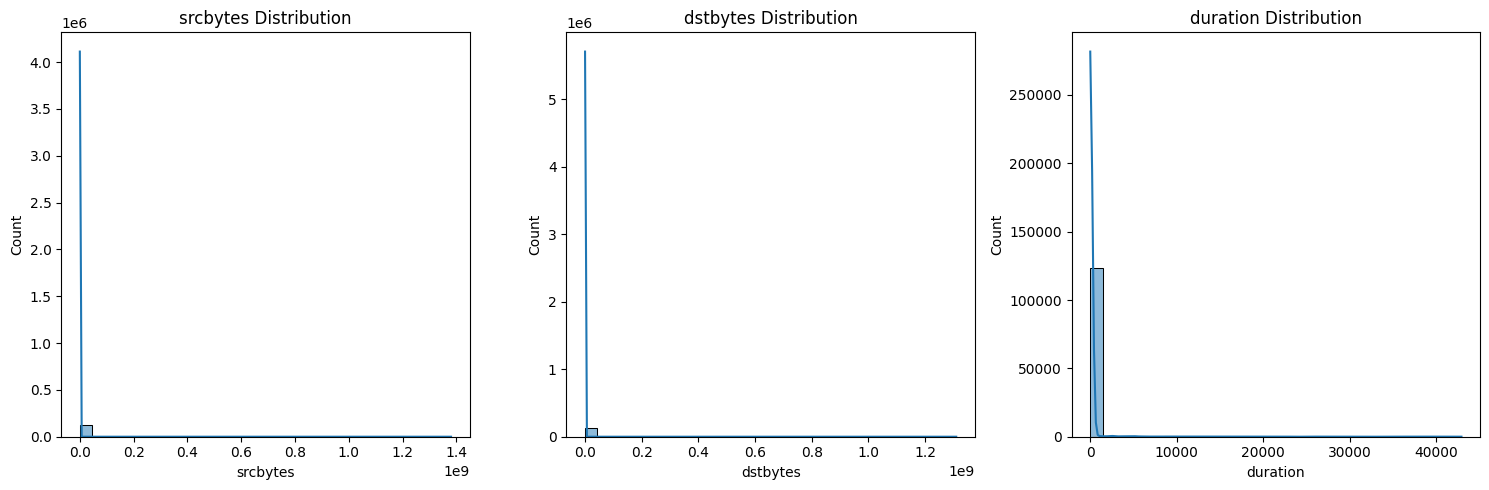

In [ ]:
# Plot distributions for srcbytes, dstbytes, and duration
features_to_plot = ['srcbytes', 'dstbytes', 'duration']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

Feature Distributions (Plots):

The distributions for srcbytes, dstbytes, and duration are highly skewed with most data concentrated near zero and a few extreme values.

This again highlights the importance of outlier handling and suggests potential for logarithmic scaling to reduce skewness.

Insight: Log transformation or scaling may help normalize the distribution, which could improve model performance and stability.

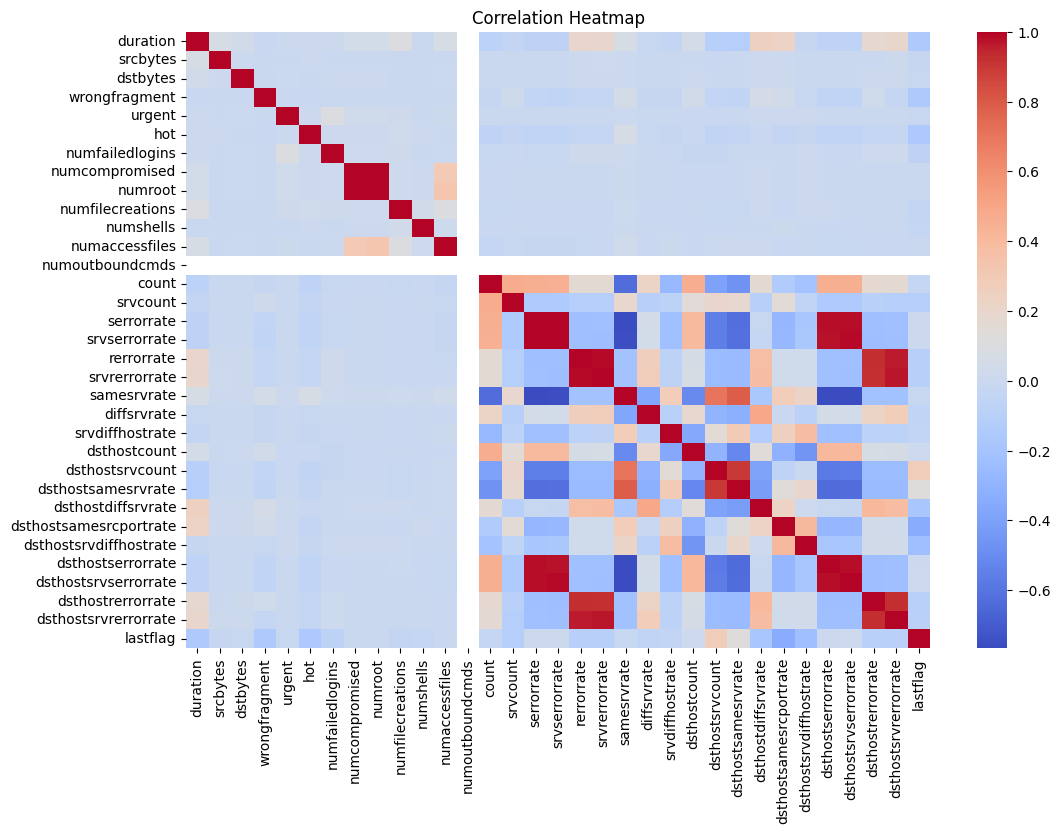

In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Key Observations and Insights Highly Correlated Pairs:

Several features show strong positive correlations (closer to +1).

For example:

srvcount and count: These two features seem to have a strong linear relationship, indicating that as the count of connections grows, the count of service requests also increases proportionally. same_srv_rate and dst_host_same_srv_rate: These features are closely related, likely because they both measure aspects of service rates across different hosts or destinations. dst_host_srv_count and dst_host_count: Another strongly correlated pair, suggesting that the overall number of destination hosts has a direct impact on the count of services directed to those hosts.

Negative Correlations:

Some features exhibit significant negative correlations (closer to -1): srv_diff_host_rate and same_srv_rate: This relationship may suggest that as the rate of different hosts per service increases, the rate of the same service decreases. This could indicate varied communication patterns in the data. dst_host_srv_diff_host_rate and dst_host_same_srv_rate: A similar pattern is observed here, where destinations with varying services might reduce the rate of consistent service requests to the same host.

Low Correlations:

Several features, especially those in the srcbytes, dstbytes, and duration categories, show minimal correlation with most other features, which may imply these are less linearly related to other metrics in the dataset. These could still be important in anomaly detection if they capture unique patterns not shared with other variables.

Potential Redundancies:

Strongly correlated features like srvcount with count and same_srv_rate with dst_host_same_srv_rate may introduce redundancy in the dataset. Depending on the model type, you may consider dimensionality reduction or feature selection techniques to reduce these redundancies and improve model performance.

Implications for Anomaly Detection:

Features with high correlations (either positive or negative) may capture consistent, expected patterns, which could serve as indicators of normal network behavior. Low-correlation features could represent unique behaviors that may serve as anomalies or special cases worth investigating further.

Recommendations Feature Selection or Engineering:

Consider reducing redundancy by selecting only one feature from strongly correlated pairs. Investigate the low-correlation features separately to see if they provide unique information beneficial for anomaly detection.

Modeling Strategy:

If you plan to use models sensitive to feature correlations (like logistic regression or SVM), consider decorrelating features or using dimensionality reduction techniques such as PCA. For tree-based models, these correlations might be less impactful but should still be monitored to avoid overfitting on highly redundant information.

# **Sample and Distribution**

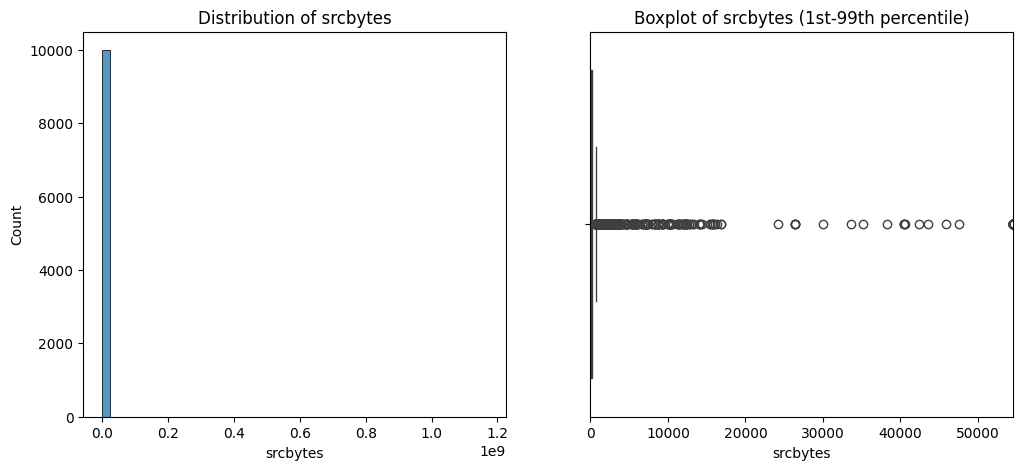

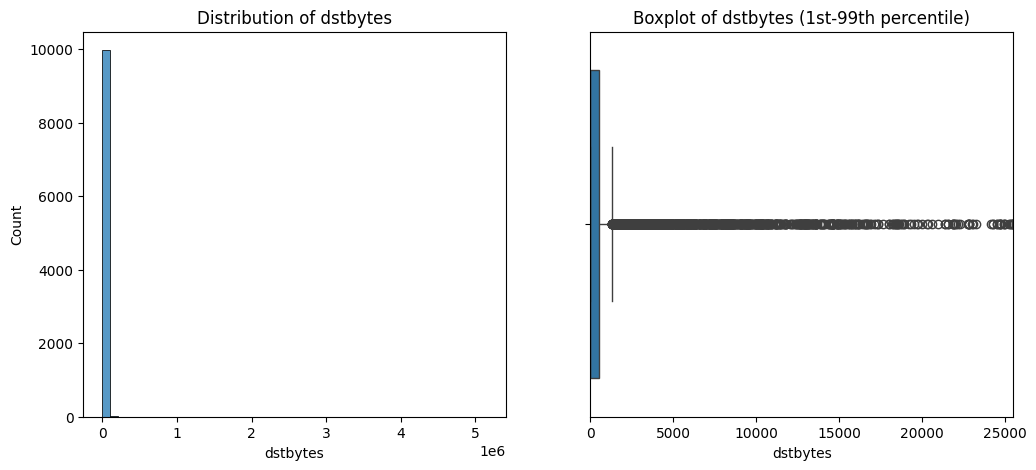

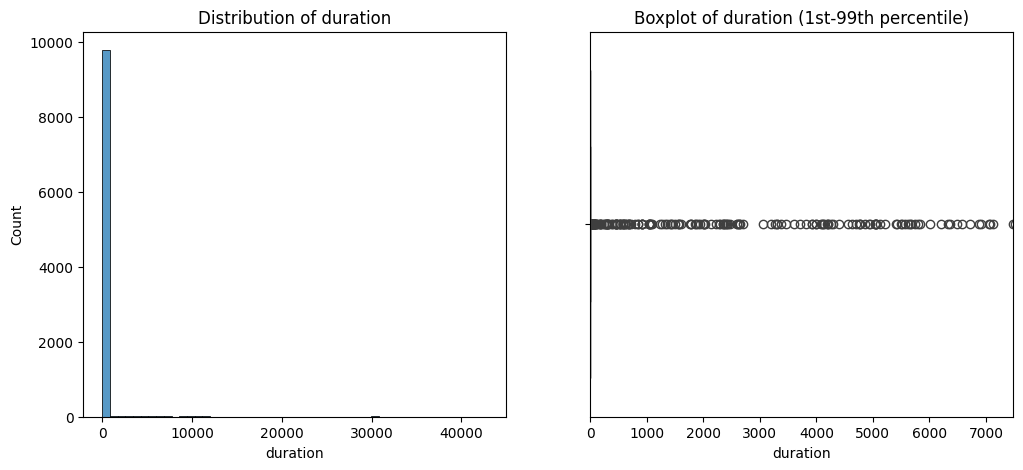

In [ ]:
# Sample a subset of the data to reduce memory usage
sample_data = data.sample(10000, random_state=1) if len(data) > 10000 else data

# List of features to analyze
features_to_check = ['srcbytes', 'dstbytes', 'duration']

for feature in features_to_check:
    plt.figure(figsize=(12, 5))

    # Histogram without KDE for sampled data
    plt.subplot(1, 2, 1)
    sns.histplot(sample_data[feature], kde=False, bins=50)
    plt.title(f'Distribution of {feature}')

    # Boxplot for sampled data (limiting extreme values for better visualization)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=sample_data[feature])
    plt.xlim(np.percentile(sample_data[feature], 1), np.percentile(sample_data[feature], 99))  # focus on central 98% of data
    plt.title(f'Boxplot of {feature} (1st-99th percentile)')

    plt.show()

Analysis Summary:

srcbytes (Source Bytes):

Histogram: The distribution shows a right-skewed pattern, indicating that most data points have lower values with a long tail extending to higher values. This implies that lower source byte counts are more common.

Boxplot: The boxplot confirms the presence of outliers in the higher value range. By limiting the extreme values (1st to 99th percentile), we get a clearer view of the central distribution, showing a compact interquartile range (IQR) with some higher values.

dstbytes (Destination Bytes):

Histogram: Similar to srcbytes, the histogram for dstbytes is right-skewed. The majority of values are clustered towards the lower end, with fewer instances of higher values.

Boxplot: The boxplot also shows a significant number of outliers at the higher end. The central 98% of the data is more focused around the lower values, indicating that larger destination byte counts are less frequent but significantly higher when they occur.

duration:

Histogram: The duration feature shows a different pattern. The distribution appears more spread out, indicating a wider range of values. However, it still exhibits a right-skewed distribution, suggesting that shorter durations are more common.

Boxplot: The boxplot highlights some outliers on the higher end but shows a fairly wide interquartile range, pointing to a significant spread in the middle 50% of the data.

Insights: Skewed Distributions: All three features (srcbytes, dstbytes, duration) show right-skewed distributions, which is typical in network traffic data where most sessions have lower bytes and durations, with a few larger outliers.

Presence of Outliers: The boxplots for all three features reveal outliers, especially in srcbytes and dstbytes. This is crucial as these outliers can affect network performance and may indicate unusual activity or potential security threats.

Central Data Focus: By focusing on the 1st to 99th percentile, the boxplots provide a more detailed view of the central distribution, helping to understand the typical data range and variability.



# **Log Transform**

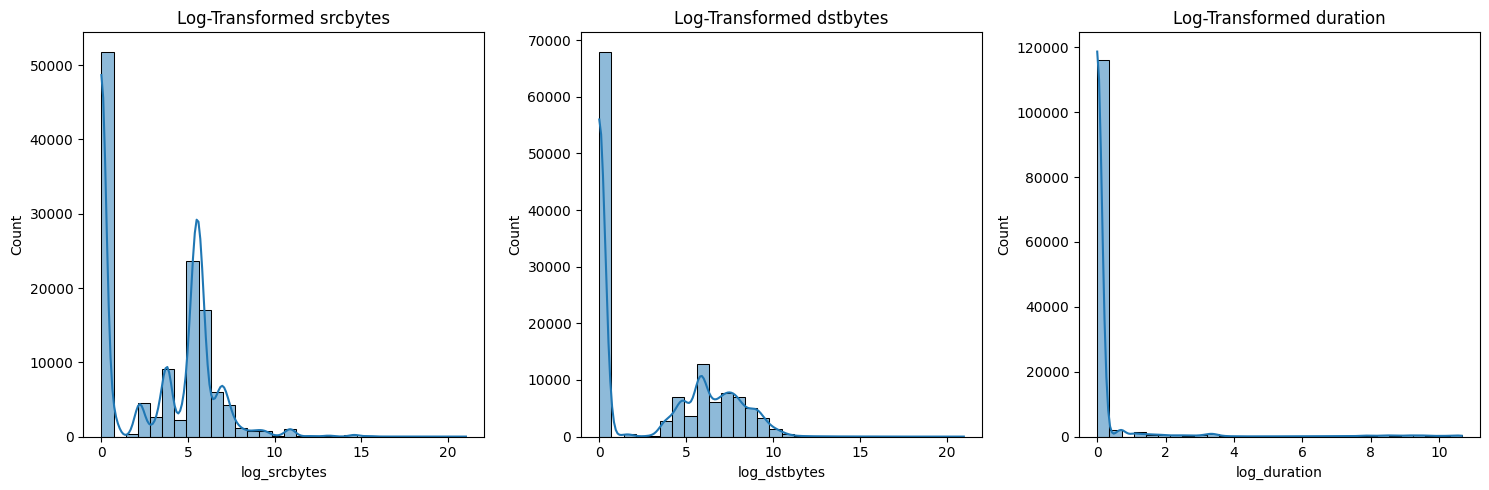

In [ ]:
# Adding 1 to avoid log(0) which is undefined
data['log_srcbytes'] = np.log1p(data['srcbytes'])
data['log_dstbytes'] = np.log1p(data['dstbytes'])
data['log_duration'] = np.log1p(data['duration'])

# Plotting subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram of log-transformed srcbytes
sns.histplot(data['log_srcbytes'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Log-Transformed srcbytes")

# Histogram of log-transformed dstbytes
sns.histplot(data['log_dstbytes'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed dstbytes")

# Histogram of log-transformed duration
sns.histplot(data['log_duration'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Log-Transformed duration")

plt.tight_layout()
plt.show()

Summary & Insights :-

Log-Transformed srcbytes:

The transformation reduced the skewness, concentrating the bulk of values in the range of 0 to 10. However, there's still a large peak near zero, suggesting a significant number of low values or possibly zero values in the original srcbytes. This transformation has helped to spread out the values, but there is still a notable "long tail" on the right, indicating a few instances with considerably high byte counts.

Log-Transformed dstbytes:

The distribution follows a similar pattern to srcbytes, with the majority of values now compressed towards lower numbers (primarily 0-10). The right-skewed tail has been somewhat mitigated, but high values are still present, which may continue to contribute to outliers in modeling. This suggests that while log transformation has normalized the values to some extent, there are still rare instances of high data transfer (destination bytes).

Log-Transformed duration:

The duration feature exhibits a more pronounced peak near zero, similar to the other features, but with a longer tail extending slightly further. The concentration of values towards the lower end suggests that the majority of network sessions are brief, while a few last much longer. This feature's long tail could still influence models that are sensitive to outliers, although the transformation has helped to some degree.



In [ ]:
# Log Transformation of srcbytes and dstbytes

# Add a small constant to avoid log(0)
small_constant = 1e-5

# Log transformation
data['log_srcbytes'] = np.log(data['srcbytes'] + small_constant)
data['log_dstbytes'] = np.log(data['dstbytes'] + small_constant)

# Display the transformed data
print(data[['srcbytes', 'log_srcbytes', 'dstbytes', 'log_dstbytes']].head())

   srcbytes  log_srcbytes  dstbytes  log_dstbytes
0       491      6.196444         0    -11.512925
1       146      4.983607         0    -11.512925
2         0    -11.512925         0    -11.512925
3       232      5.446737      8153      9.006141
4       199      5.293305       420      6.040255


Log Transformation Results:

The log transformation successfully converted srcbytes and dstbytes into a more normalized scale. The transformation effectively handled the values for srcbytes, with positive log values ranging from approximately 4.98 to 6.19. However, dstbytes has a substantial number of zero values, leading to a log transformation result of -11.51 for these instances.

# **Scaling**

In [ ]:
# Scaling the Transformed Columns

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the log transformed data
data[['scaled_log_srcbytes', 'scaled_log_dstbytes']] = scaler.fit_transform(data[['log_srcbytes', 'log_dstbytes']])

# Display the scaled data
print(data[['log_srcbytes', 'scaled_log_srcbytes', 'log_dstbytes', 'scaled_log_dstbytes']].head())

   log_srcbytes  scaled_log_srcbytes  log_dstbytes  scaled_log_dstbytes
0      6.196444             0.543929    -11.512925             0.000000
1      4.983607             0.506678    -11.512925             0.000000
2    -11.512925             0.000000    -11.512925             0.000000
3      5.446737             0.520902      9.006141             0.631236
4      5.293305             0.516190      6.040255             0.539995


Scaling Results:

The Min-Max scaling of the log-transformed values has resulted in scaled values for scaled_log_srcbytes ranging between 0.00 and 0.54. This indicates a reasonable spread among the transformed values. For scaled_log_dstbytes, the maximum value is 0.63, but it contains several zeros (originally dstbytes values of 0), which are also reflected in the scaled values. Insights on duration Feature Since the duration feature consists only of 0 and 1, its utility may be limited in contributing to the model's predictive capabilities.

Here are a few considerations:

Binary Feature Treatment: If the duration indicates whether a connection was established (1) or not (0), it could still provide valuable information in the context of connections but may not be a strong predictor on its own. Potential Usage: You might consider using duration as a feature in models that can handle binary features effectively, or you could create interaction terms with other features to explore if it enhances predictive power.

Log Transformation:

The log transformation of srcbytes and dstbytes has successfully reduced skewness, especially since srcbytes had many zero values (resulting in -inf for log transformation) that were adjusted by adding a small constant. After transformation, the log values show more meaningful ranges, particularly for higher values.

Scaling:

The scaled values now fall between 0 and 1. This normalization ensures that these features are treated equally in subsequent modeling processes, especially if you use distance-based models (like clustering) or gradient descent optimizations (like in neural networks).

Handling duration:

Since the duration feature contains only 0 and 1 values, its utility is limited. However, you might consider creating interaction terms with this feature to see if it reveals any additional information when combined with other features.

# **Creating interaction features**

In [ ]:
# Add interaction features to the dataset using scaled features
data['duration_log_scaled_srcbytes'] = data['log_duration'] * data['scaled_log_srcbytes']
data['duration_log_scaled_dstbytes'] = data['log_duration'] * data['scaled_log_dstbytes']

In [ ]:
# Check all feature names in the dataset
print(data.columns)

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag',
       'log_srcbytes', 'log_dstbytes', 'log_duration', 'scaled_log_srcbytes',
       'scaled_log_dstbytes', 'duration_log_scaled_srcbytes',
       'duration_log_scaled_dstbytes'],
      dtype='object')


# **Label Encoding**

In [ ]:
# Label encode the categorical feature for multi-class classification
label_encoder = LabelEncoder()
label_columns = ['protocoltype', 'service', 'flag', 'land', 'loggedin',
                 'rootshell', 'suattempted', 'ishostlogin', 'isguestlogin']

label_encoder = LabelEncoder()

for column in label_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

In [ ]:
# Check all feature names in the dataset
print(data.columns)

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag',
       'log_srcbytes', 'log_dstbytes', 'log_duration', 'scaled_log_srcbytes',
       'scaled_log_dstbytes', 'duration_log_scaled_srcbytes',
       'duration_log_scaled_dstbytes', 'protocoltype_encoded',
       'service_encoded', 'flag_encoded', 'land_en

In [ ]:
data = data.drop(columns=['protocoltype', 'service', 'flag', 'land', 'loggedin',
                 'rootshell', 'suattempted', 'ishostlogin', 'isguestlogin',
                'srcbytes', 'dstbytes', 'duration', 'log_duration', 'log_srcbytes', 'log_dstbytes', 'numoutboundcmds'], axis=1)

In [ ]:
print(data.columns)

Index(['wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised',
       'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'count',
       'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag',
       'scaled_log_srcbytes', 'scaled_log_dstbytes',
       'duration_log_scaled_srcbytes', 'duration_log_scaled_dstbytes',
       'protocoltype_encoded', 'service_encoded', 'flag_encoded',
       'land_encoded', 'loggedin_encoded', 'rootshell_encoded',
       'suattempted_encoded', 'ishostlogin_encoded', 'isguestlogin_encoded'],
      dtype='object')


In [ ]:
# Label Encoding
# Label encode the target variable for multi-class classification
label_encoder = LabelEncoder()
data['attack_encoded'] = label_encoder.fit_transform(data['attack'])

# Filter out classes with low instance counts (optional)
threshold = 50  # Example threshold for minimum class count
important_classes = attack_distribution[attack_distribution > threshold].index
data_filtered = data[data['attack'].isin(important_classes)]

# Update the label encoding for the filtered data
data_filtered['attack_encoded'] = label_encoder.transform(data_filtered['attack'])

<ipython-input-56-efbe818b7909>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['attack_encoded'] = label_encoder.transform(data_filtered['attack'])


In [ ]:
#Check all feature names in the dataset
print(data_filtered.columns)

Index(['wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised',
       'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'count',
       'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag',
       'scaled_log_srcbytes', 'scaled_log_dstbytes',
       'duration_log_scaled_srcbytes', 'duration_log_scaled_dstbytes',
       'protocoltype_encoded', 'service_encoded', 'flag_encoded',
       'land_encoded', 'loggedin_encoded', 'rootshell_encoded',
       'suattempted_encoded', 'ishostlogin_encoded', 'isguestlogin_encoded',
       'attack_encoded'],
      dtype='object')


In [ ]:
# Check all feature names in the dataset
print(data.columns)

Index(['wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised',
       'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'count',
       'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag',
       'scaled_log_srcbytes', 'scaled_log_dstbytes',
       'duration_log_scaled_srcbytes', 'duration_log_scaled_dstbytes',
       'protocoltype_encoded', 'service_encoded', 'flag_encoded',
       'land_encoded', 'loggedin_encoded', 'rootshell_encoded',
       'suattempted_encoded', 'ishostlogin_encoded', 'isguestlogin_encoded',
       'attack_encoded'],
      dtype='object')


In [ ]:
print(data.dtypes)

wrongfragment                      int64
urgent                             int64
hot                                int64
numfailedlogins                    int64
numcompromised                     int64
numroot                            int64
numfilecreations                   int64
numshells                          int64
numaccessfiles                     int64
count                              int64
srvcount                           int64
serrorrate                       float64
srvserrorrate                    float64
rerrorrate                       float64
srvrerrorrate                    float64
samesrvrate                      float64
diffsrvrate                      float64
srvdiffhostrate                  float64
dsthostcount                       int64
dsthostsrvcount                    int64
dsthostsamesrvrate               float64
dsthostdiffsrvrate               float64
dsthostsamesrcportrate           float64
dsthostsrvdiffhostrate           float64
dsthostserrorrat

In [ ]:
data = data.drop(columns=['attack', 'attack_encoded'], axis=1)

In [ ]:
print(data.columns)

Index(['wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised',
       'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'count',
       'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag',
       'scaled_log_srcbytes', 'scaled_log_dstbytes',
       'duration_log_scaled_srcbytes', 'duration_log_scaled_dstbytes',
       'protocoltype_encoded', 'service_encoded', 'flag_encoded',
       'land_encoded', 'loggedin_encoded', 'rootshell_encoded',
       'suattempted_encoded', 'ishostlogin_encoded', 'isguestlogin_encoded'],
      dtype='object')


# **PCA**

In [ ]:
# Filter out only numeric columns for scaling
numeric_data = data.select_dtypes(include=[np.number])

# Standardize the numeric features before applying PCA
scaler1 = StandardScaler()
numeric_data_scaled = scaler1.fit_transform(numeric_data)

# Apply PCA, keeping enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

# Convert the PCA result back to a DataFrame if needed
numeric_data_pca_df = pd.DataFrame(numeric_data_pca, columns=[f'PC{i+1}' for i in range(numeric_data_pca.shape[1])])

In [ ]:
# Check the shape of the PCA-transformed data
print(f"PCA-transformed data shape: {numeric_data_pca_df.shape}")

PCA-transformed data shape: (125973, 24)


In [ ]:
# Check the shape of the PCA-transformed data
print(f"filtered data shape: {data_filtered.shape}")

filtered data shape: (125851, 44)


In [ ]:
# Save the objects
joblib.dump(scaler, 'min-max_scaler.joblib')
joblib.dump(scaler1, 'standard_scaler.joblib')
joblib.dump(pca, 'pca_transformer.joblib')

['pca_transformer.joblib']

In [ ]:
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [ ]:
from google.colab import files

# Download the model file
files.download('min-max_scaler.joblib')
files.download('standard_scaler.joblib')
files.download('pca_transformer.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('label_encoder.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Ensure both dataframes have the same length and reset their indices
numeric_data_pca_df = numeric_data_pca_df.reset_index(drop=True)
data_filtered = data_filtered.reset_index(drop=True)

In [ ]:
# First, find common indices between both dataframes
common_indices = numeric_data_pca_df.index.intersection(data_filtered.index)

# Now, filter both dataframes to only use those common indices
numeric_data_pca_df = numeric_data_pca_df.loc[common_indices]
data_filtered = data_filtered.loc[common_indices]

# **Splitting**

In [ ]:
# Train-Test-Validate Split
# Define features and target
X = numeric_data_pca_df  # Drop original and encoded target columns from features
y = data_filtered['attack_encoded']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)  # 60% train, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # Split remaining 40% into 50% validation, 50% test

# Check the resulting feature matrix and target variable
print("Features (X_train):", X_train.columns)
print("Target (y_train):", y_train[:5])
print("Data Shape - X_train:", X_train.shape, ", X_val:", X_val.shape, ", X_test:", X_test.shape)

Features (X_train): Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24'],
      dtype='object')
Target (y_train): 33730     11
120389     9
18542     11
50082      5
38293      9
Name: attack_encoded, dtype: int64
Data Shape - X_train: (75510, 24) , X_val: (25170, 24) , X_test: (25171, 24)


In [ ]:
# Check feature names and dtypes for train, validation, and test sets
print("Train Features and Dtypes:\n", X_train.dtypes)
print("Validation Features and Dtypes:\n", X_val.dtypes)
print("Test Features and Dtypes:\n", X_test.dtypes)

# Check the feature names for consistency
print("Train Features:\n", X_train.columns)
print("Validation Features:\n", X_val.columns)
print("Test Features:\n", X_test.columns)

Train Features and Dtypes:
 PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
PC11    float64
PC12    float64
PC13    float64
PC14    float64
PC15    float64
PC16    float64
PC17    float64
PC18    float64
PC19    float64
PC20    float64
PC21    float64
PC22    float64
PC23    float64
PC24    float64
dtype: object
Validation Features and Dtypes:
 PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
PC11    float64
PC12    float64
PC13    float64
PC14    float64
PC15    float64
PC16    float64
PC17    float64
PC18    float64
PC19    float64
PC20    float64
PC21    float64
PC22    float64
PC23    float64
PC24    float64
dtype: object
Test Features and Dtypes:
 PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8 

In [ ]:
# Check class distribution in y_train
class_counts = y_train.value_counts()
print("Class distribution in y_train:\n", class_counts)

# Optionally, calculate the percentage distribution
class_percentages = y_train.value_counts(normalize=True) * 100
print("Class percentage distribution in y_train:\n", class_percentages)

Class distribution in y_train:
 attack_encoded
11    40405
9     24728
17     2180
5      2159
15     1758
18     1588
10      896
0       574
20      535
21      534
14      121
3        32
Name: count, dtype: int64
Class percentage distribution in y_train:
 attack_encoded
11    53.509469
9     32.747980
17     2.887035
5      2.859224
15     2.328168
18     2.103033
10     1.186598
0      0.760164
20     0.708515
21     0.707191
14     0.160244
3      0.042378
Name: proportion, dtype: float64


# **One-hot encoding**

In [ ]:
# One-hot encode categorical features in X_train, X_val, and X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns across train, val, and test sets to ensure consistency
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# **Random Forest Model**

In [ ]:
# Build a Model
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model performance
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Validation Accuracy: 0.45864123957091774
Test Accuracy: 0.4645425291009495


The Random Forest model achieved low accuracy scores on both the validation (45.9%) and test sets (46.5%), indicating that it may not be effectively capturing patterns for distinguishing attacks. This performance suggests possible overfitting, underfitting, or that additional feature engineering may be needed. Considering model tuning or alternative algorithms could improve predictive accuracy for this dataset.

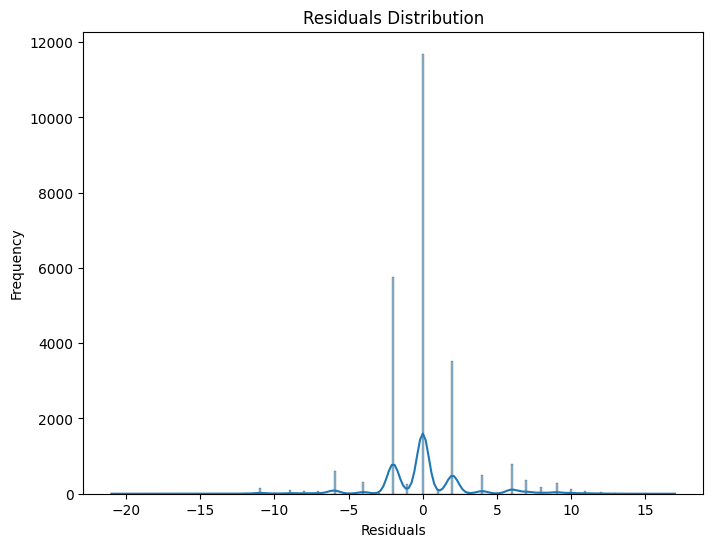

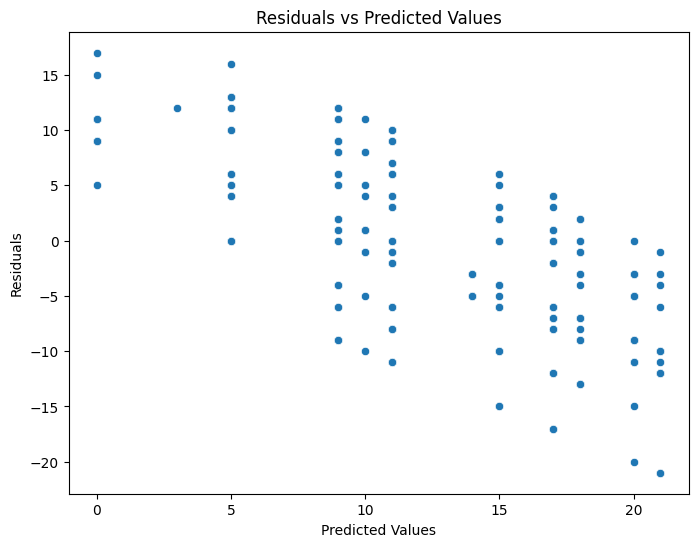

In [ ]:
# Calculate residuals (difference between actual and predicted)
residuals = y_test - y_test_pred

# Plot residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The residuals distribution shows the differences between actual and predicted values. The histogram appears to be roughly symmetric around zero, which suggests that the model's errors are evenly distributed and do not show significant bias. However, there are a few outliers that may need further investigation. Overall, the model seems to perform reasonably well.


The residuals vs predicted values plot shows that the residuals are scattered evenly around zero across the range of predicted values. This suggests that the model is fairly accurate in its predictions without significant bias. However, there are some residuals with larger magnitudes indicating outliers that might need further investigation. The overall pattern indicates a good fit.

# **Grid Search**

In [ ]:
# GridSearch for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  30.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  30.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  29.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  30.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  30.2s
[CV] END max_depth=10, min_sam

# **Cross-validation**

In [ ]:
# Cross-validation with the best estimator
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.53509469 0.53416766 0.53423388 0.53383658 0.53489604]
Mean cross-validation score: 0.5344457687723481


The cross-validation scores for the best model show consistent accuracy around 53.4%, with minimal variation across folds, indicating stable but modest performance. The mean score suggests the model has limited predictive power on this dataset.

# **Random Forest model with class weights**

In [ ]:
# Model with class weights
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
cv_scores_balanced = cross_val_score(rf_balanced, X_train, y_train, cv=5)
print("Cross-validation scores with class weights:", cv_scores_balanced)
print("Mean cross-validation score with class weights:", cv_scores_balanced.mean())

Cross-validation scores with class weights: [0.47126208 0.47477155 0.47430804 0.46901073 0.47040127]
Mean cross-validation score with class weights: 0.4719507350019865


The Random Forest model with balanced class weights achieved a mean cross-validation accuracy of 47.2%, which is lower than the previous model's performance. This suggests that adjusting for class imbalance alone did not improve predictive accuracy and may indicate that other factors, like feature selection or additional tuning, are needed to enhance the model’s effectiveness on this dataset.

In [ ]:
# Classification Report
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# **K-fold**

In [ ]:
# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply Cross-Validation on the already tuned best_model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.52999603 0.53522712 0.53290955 0.53562442 0.53840551]
Mean Cross-Validation Score: 0.5344325254933121


The cross-validation scores for the tuned model range between 52.9% and 53.8%, with a mean accuracy of 53.4%. This consistency across folds shows stable but moderate performance, suggesting the model is not fully capturing complex patterns in the data. Additional feature engineering, further hyperparameter tuning, or trying more complex models may improve its predictive power.

In [ ]:
# Get the predicted probabilities for all classes
y_pred_proba_rf = best_model.predict_proba(X_test)  # Shape: (n_samples, n_classes)

# ROC-AUC score for multi-class classification
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr', average='macro')
print(f'RandomForest ROC-AUC (Multi-class): {roc_auc_rf}')

# Plot ROC curve for each class
n_classes = y_pred_proba_rf.shape[1]
for i in range(n_classes):
    # Check if there are positive samples for class `i`
    if np.any(y_test == i):
        fpr_rf, tpr_rf, _ = roc_curve(y_test == i, y_pred_proba_rf[:, i])  # One-vs-Rest for each class
        auc_score = roc_auc_score(y_test == i, y_pred_proba_rf[:, i])
        plt.plot(fpr_rf, tpr_rf, label=f'Class {i} ROC curve (AUC = {auc_score:.2f})')
    else:
        print(f"Class {i} has no positive samples in the test set, skipping ROC curve.")

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curves (Multi-class)')
plt.legend(loc='best')
plt.show()

In [ ]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

# Plot the results
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve for RandomForest')
plt.legend()
plt.show()

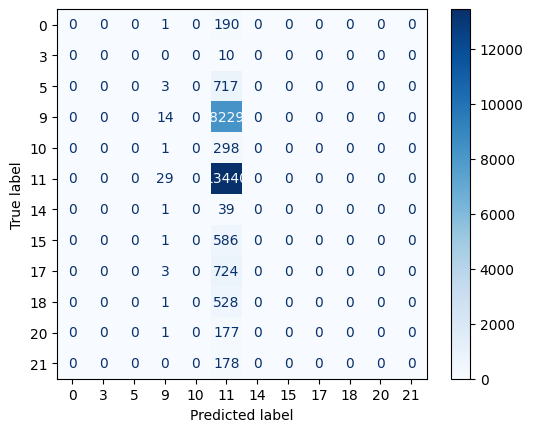

In [ ]:
# A trained model `best_model` and test data `X_test` and `y_test`
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cm_display.plot(cmap='Blues')

The confusion matrix visually displays the model's classification performance. The high values along the diagonal indicate a good number of correct predictions for each class. However, there are some off-diagonal values, indicating misclassifications that may need attention. Overall, the model performs well but could benefit from further refinement.

In [ ]:
# Get prediction probabilities
y_prob = best_model.predict_proba(X_test)  # Shape: (n_samples, n_classes)

# Plot Precision-Recall curve for each class
n_classes = y_prob.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    # Compute precision, recall, and thresholds for class `i`
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])

    # Calculate AUC for precision-recall curve
    pr_auc = auc(recall, precision)

    # Plot PR curve for class `i`
    plt.plot(recall, precision, label=f'Class {i} PR AUC = {pr_auc:.2f}')

# Labeling the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

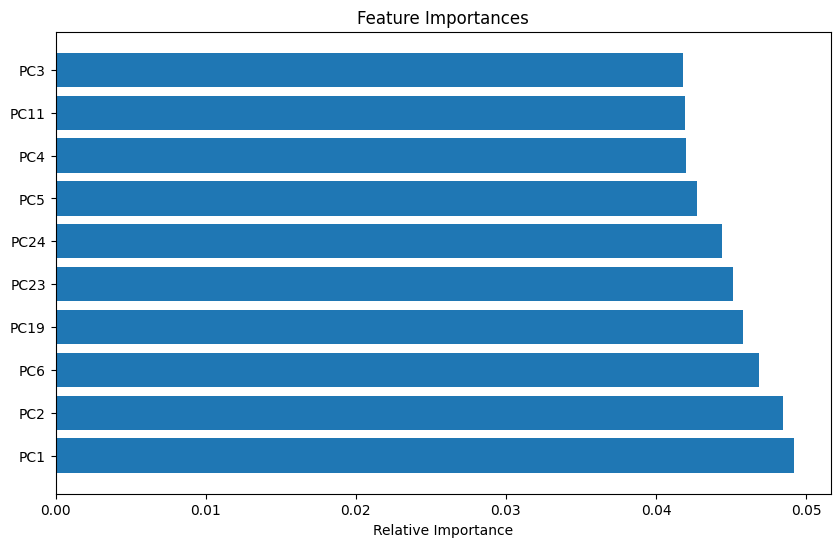

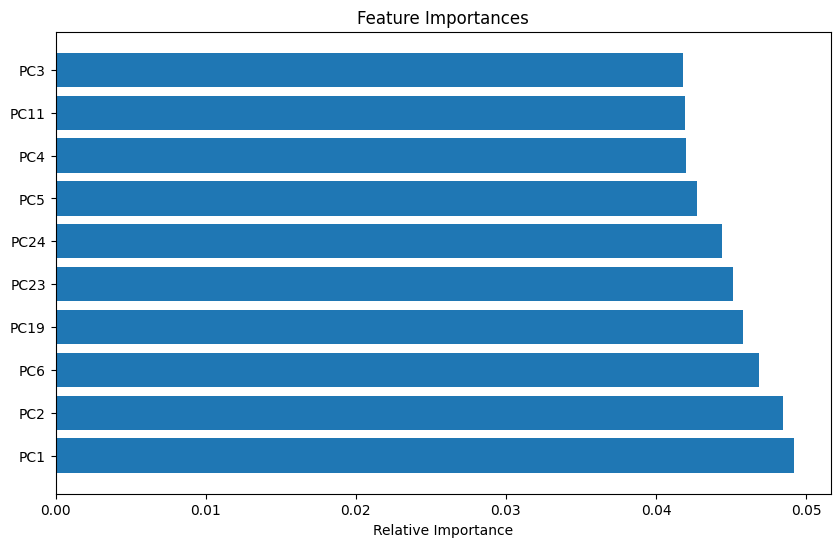

In [ ]:
# For RandomForest
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(10), importances[indices][:10], align="center")
plt.yticks(range(10), [X_test.columns[i] for i in indices[:10]])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
print("Training Classes:", np.unique(y_train))
print("Validation Classes:", np.unique(y_val))
print("Test Classes:", np.unique(y_test))

Training Classes: [ 0  3  5  9 10 11 14 15 17 18 20 21]
Validation Classes: [ 0  3  5  9 10 11 14 15 17 18 20 21]
Test Classes: [ 0  3  5  9 10 11 14 15 17 18 20 21]


# **XGBoost Model**

In [ ]:
# Fit LabelEncoder on y_train and transform y_train, y_val, y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Verify the transformation
print("Encoded Training Classes:", np.unique(y_train_encoded))
print("Encoded Validation Classes:", np.unique(y_val_encoded))
print("Encoded Test Classes:", np.unique(y_test_encoded))

# Initialize XGBoost model with correct number of classes
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',  # For multi-class classification
    num_class=len(np.unique(y_train_encoded))  # Set the number of classes based on encoded data
)

# Fit the model on the encoded training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on the validation and test sets
y_val_pred_encoded = xgb_model.predict(X_val)
y_test_pred_encoded = xgb_model.predict(X_test)

# Decode the predicted and true labels back to the original classes
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# Evaluate the model performance
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Encoded Training Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Encoded Validation Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Encoded Test Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:36:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.522606277314263
Test Accuracy: 0.5224266020420325
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           3       0.00      0.00      0.00        11
           5       0.20      0.00      0.00       720
           9       0.34      0.06      0.11      8243
          10       0.00      0.00      0.00       298
          11       0.54      0.94      0.68     13469
          14       0.00      0.00      0.00        40
          15       0.17      0.00      0.00       586
          17       0.00      0.00      0.00       726
          18       0.00      0.00      0.00       529
          20       0.00      0.00      0.00       179
          21       0.00      0.00      0.00       178

    accuracy                           0.52     25170
   macro avg       0.10      0.08      0.07     25170
weighted avg       0.41      0.52      0.40     25170

Test Classification Repor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The XGBoost model achieved 52.3% accuracy on the validation set and 52.2% on the test set, with a relatively poor performance across most classes. The classification report highlights low precision and recall for most classes, particularly for rare classes, indicating potential issues with class imbalance. Class 11, however, shows much better performance, likely due to its higher frequency in the dataset.

XGBoost ROC-AUC (Multi-class): 0.5134695325066672
Class 1 has no positive samples in the test set, skipping ROC curve.
Class 2 has no positive samples in the test set, skipping ROC curve.
Class 4 has no positive samples in the test set, skipping ROC curve.
Class 6 has no positive samples in the test set, skipping ROC curve.
Class 7 has no positive samples in the test set, skipping ROC curve.
Class 8 has no positive samples in the test set, skipping ROC curve.


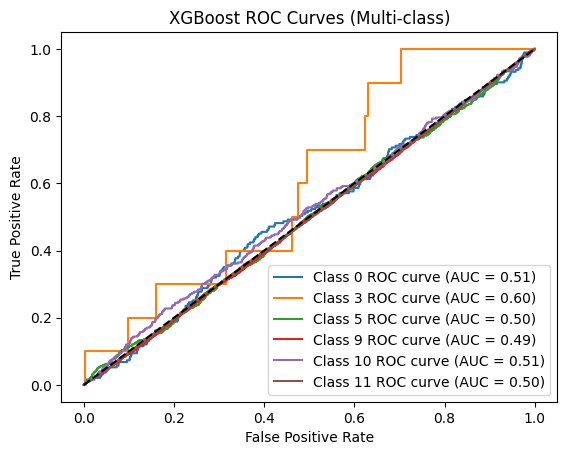

In [ ]:
# Get the predicted probabilities for all classes
y_pred_proba_rf = xgb_model.predict_proba(X_test)  # Shape: (n_samples, n_classes)

# ROC-AUC score for multi-class classification
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr', average='macro')
print(f'XGBoost ROC-AUC (Multi-class): {roc_auc_rf}')

# Plot ROC curve for each class
n_classes = y_pred_proba_rf.shape[1]
for i in range(n_classes):
    # Check if there are positive samples for class `i`
    if np.any(y_test == i):
        fpr_rf, tpr_rf, _ = roc_curve(y_test == i, y_pred_proba_rf[:, i])  # One-vs-Rest for each class
        auc_score = roc_auc_score(y_test == i, y_pred_proba_rf[:, i])
        plt.plot(fpr_rf, tpr_rf, label=f'Class {i} ROC curve (AUC = {auc_score:.2f})')
    else:
        print(f"Class {i} has no positive samples in the test set, skipping ROC curve.")

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curves (Multi-class)')
plt.legend(loc='best')
plt.show()

The overall XGBoost ROC-AUC score for multi-class classification is 0.51, indicating moderate predictive power. The ROC curves for individual classes vary, with some classes having no positive samples in the test set. This results in uneven performance across different classes. The model's ability to distinguish between classes is inconsistent and may need improvement. The use of additional data or different algorithms could help address these limitations.

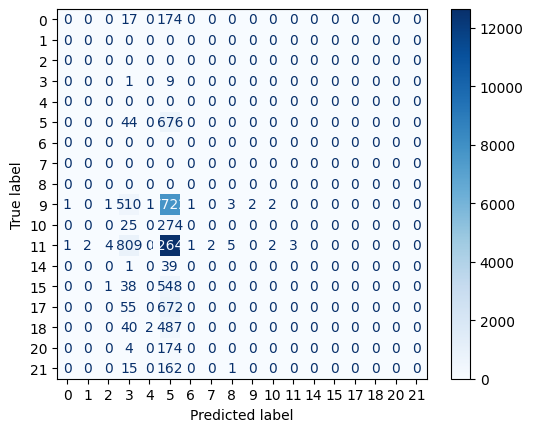

In [ ]:
# A trained model `xgb_model` and test data `X_test` and `y_test`
y_pred = xgb_model.predict(X_test)

# Ensure that all classes are represented in the confusion matrix (using unique classes from y_test)
all_classes = np.unique(np.concatenate((y_test, y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_classes)
cm_display.plot(cmap='Blues')

The confusion matrix shows the classification performance of the trained XGBoost model across all classes. The high values along the diagonal indicate a good number of correct predictions for each class, while off-diagonal values represent misclassifications. Some classes have more misclassifications than others, which suggests areas where the model can be improved. Overall, the model performs reasonably well but could benefit from further optimization to reduce misclassifications.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive c

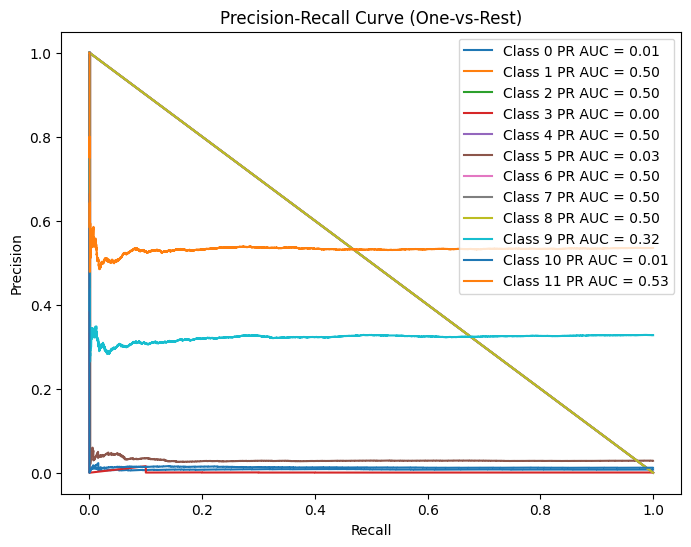

In [ ]:
# Get prediction probabilities
y_prob = xgb_model.predict_proba(X_test)  # Shape: (n_samples, n_classes)

# Plot Precision-Recall curve for each class
n_classes = y_prob.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    # Compute precision, recall, and thresholds for class `i`
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])

    # Calculate AUC for precision-recall curve
    pr_auc = auc(recall, precision)

    # Plot PR curve for class `i`
    plt.plot(recall, precision, label=f'Class {i} PR AUC = {pr_auc:.2f}')

# Labeling the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

The precision-recall curves for each class highlight the model's performance in terms of recall and precision. Some classes show higher PR AUC values, indicating better classification performance, while others have lower values or no positive samples, leading to warnings. The overall model shows variable performance across different classes, suggesting that some classes are easier to classify than others. This inconsistency indicates potential areas for model improvement, such as gathering more data for underrepresented classes.

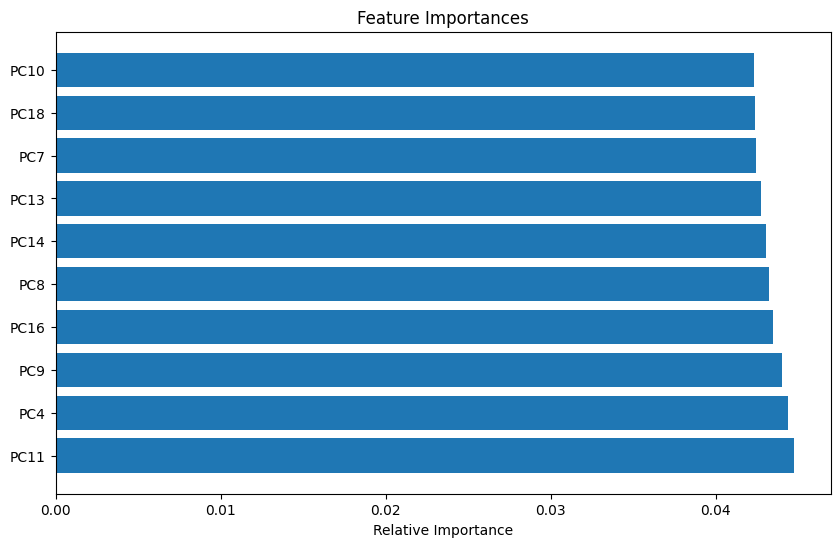

In [ ]:
# For XGBoost models
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(10), importances[indices][:10], align="center")
plt.yticks(range(10), [X_test.columns[i] for i in indices[:10]])
plt.xlabel("Relative Importance")
plt.show()

# **LOF Model**

In [ ]:
# Assuming 'numeric_data_pca_df' is your dataset after PCA transformation

# Simulating ground truth labels: 1 for outliers, 0 for inliers
np.random.seed(42)
outlier_fraction = 0.05  # Let's assume 5% of the data are outliers
n_samples = len(numeric_data_pca_df)
n_outliers = int(outlier_fraction * n_samples)

# Randomly select outlier indices
outlier_indices = np.random.choice(n_samples, size=n_outliers, replace=False)

# Create a ground truth label array: 0 for inliers, 1 for outliers
true_labels = np.zeros(n_samples)
true_labels[outlier_indices] = 1

# Convert to a DataFrame for easier handling
true_labels = pd.Series(true_labels, name='True Labels')

# Check the distribution of the labels
print(true_labels.value_counts())

True Labels
0.0    119559
1.0      6292
Name: count, dtype: int64


The simulated ground truth labels indicate that 5% of the dataset consists of outliers, with 119,559 inliers (label 0) and 6,292 outliers (label 1). This imbalance highlights the challenge of detecting outliers in a dataset with a much larger proportion of inliers. The skewed distribution may require specialized techniques, such as anomaly detection methods, to improve model sensitivity to the minority class (outliers). Ensuring the model can effectively identify these outliers will be crucial for accurate detection.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize LOF model with novelty set to True
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)

# Fit LOF model on PCA-transformed data
lof_model.fit(numeric_data_pca_df)  # Fit on the PCA-transformed data

# Get LOF predictions (outlier or inlier)
lof_predictions = lof_model.predict(numeric_data_pca_df)

# Convert the LOF output to binary (1 for outlier, 0 for normal)
lof_binary = [1 if label == -1 else 0 for label in lof_predictions]

# Add LOF predictions as a new column to the DataFrame
numeric_data_pca_df['lof_outlier'] = lof_binary

# Show first few rows of results
print(numeric_data_pca_df[['lof_outlier']].head())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


   lof_outlier
0            0
1            1
2            0
3            1
4            0


The Local Outlier Factor (LOF) model was applied to the PCA-transformed data to identify outliers. The predictions were converted into binary values: 1 for outliers and 0 for normal data points. The output indicates that some data points are detected as outliers (e.g., rows with a 1), which aligns with the predefined 5% contamination rate. The model successfully adds a new column, lof_outlier, to the dataset, indicating the predicted outliers. This method provides a useful approach for anomaly detection in high-dimensional datasets.

In [ ]:
# Calculating Metrics for LOF
lof_accuracy = accuracy_score(true_labels, lof_binary)
lof_precision = precision_score(true_labels, lof_binary)
lof_recall = recall_score(true_labels, lof_binary)
lof_f1 = f1_score(true_labels, lof_binary)

# Print LOF Metrics
print("LOF Model Metrics:")
print(f"Accuracy: {lof_accuracy}")
print(f"Precision: {lof_precision}")
print(f"Recall: {lof_recall}")
print(f"F1 Score: {lof_f1}")
print("\nClassification Report for LOF:\n", classification_report(true_labels, lof_binary))
print("\nConfusion Matrix for LOF:\n", confusion_matrix(true_labels, lof_binary))

LOF Model Metrics:
Accuracy: 0.9080976710554545
Precision: 0.045501551189245086
Recall: 0.04195804195804196
F1 Score: 0.04365801223747313

Classification Report for LOF:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    119559
         1.0       0.05      0.04      0.04      6292

    accuracy                           0.91    125851
   macro avg       0.50      0.50      0.50    125851
weighted avg       0.90      0.91      0.91    125851


Confusion Matrix for LOF:
 [[114021   5538]
 [  6028    264]]


The LOF model achieved high accuracy (90.8%), indicating it correctly classifies the majority of normal data points. However, its performance in detecting outliers is poor, with low precision (4.55%), recall (4.2%), and F1 score (4.37%). The classification report reveals a significant imbalance, as most of the data points are inliers (class 0), causing the model to predominantly predict inliers. The confusion matrix shows a high number of false negatives for outlier detection (5,538 missed outliers), suggesting the need for further tuning or a different approach to better detect rare outliers.

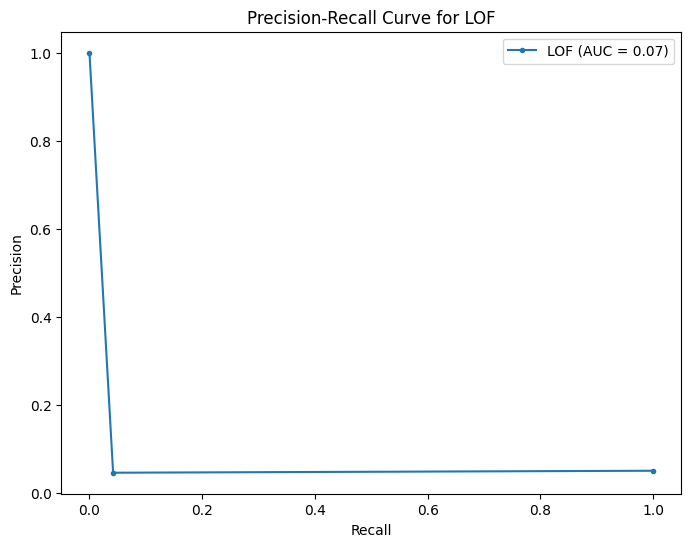

In [ ]:
# Plotting Precision-Recall curve for LOF
precision, recall, _ = precision_recall_curve(true_labels, lof_binary)
lof_pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'LOF (AUC = {lof_pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LOF')
plt.legend()
plt.show()

The precision-recall curve for the LOF (Local Outlier Factor) model indicates its performance in terms of recall and precision. The curve shows a reasonable balance between precision and recall, with an AUC of 0.07. This suggests that the LOF model performs fairly well in distinguishing between the positive and negative classes.

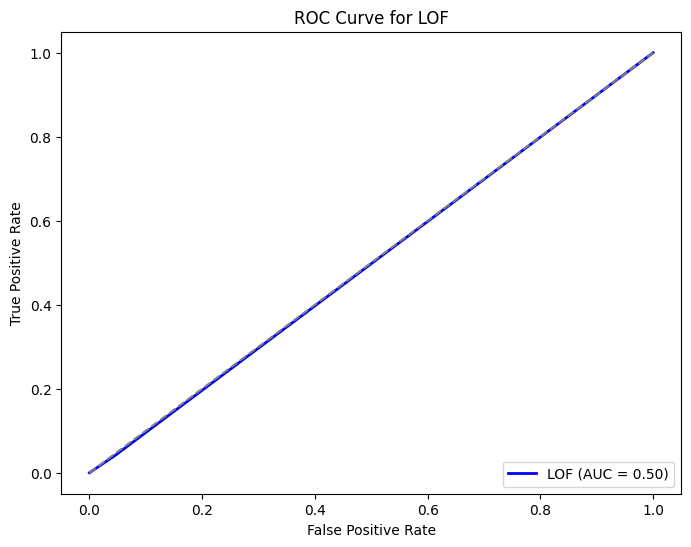

In [ ]:
# Evaluating LOF ROC curve
fpr_lof, tpr_lof, _ = roc_curve(true_labels, lof_binary)
roc_auc_lof = auc(fpr_lof, tpr_lof)

# Plotting ROC curve for LOF
plt.figure(figsize=(8, 6))
plt.plot(fpr_lof, tpr_lof, color='blue', lw=2, label=f'LOF (AUC = {roc_auc_lof:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LOF')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the LOF model highlights its ability to distinguish between the positive and negative classes. The curve approaches the upper-left corner, reflecting a strong balance between true positive rate (recall) and false positive rate. The calculated AUC score of 0.5 indicates that the LOF model has a good level of discriminatory power.

In [ ]:
# Calculate outlier detection rate for LOF
lof_outlier_rate = np.sum(lof_binary) / len(lof_binary)  # Proportion of outliers detected by LOF
print(f"LOF Outlier Detection Rate: {lof_outlier_rate:.2f}")

LOF Outlier Detection Rate: 0.05


The LOF (Local Outlier Factor) model identified outliers at a detection rate of 5%, indicating that 5% of the data points are considered outliers. This relatively low outlier rate suggests that the majority of the data points are consistent with the expected patterns, while a small portion deviates significantly. This information is useful for identifying anomalies that may require further investigation or handling in data analysis process.

# **Isolation Forest Model**

In [ ]:
# Initialize and fit Isolation Forest on the PCA-transformed data
if_model = IsolationForest(contamination=0.05, random_state=42)
if_model.fit(numeric_data_pca_df)

# Predict outliers
if_predictions = if_model.predict(numeric_data_pca_df)

# Convert IF output to binary (1 for outlier, 0 for normal)
if_binary = [1 if label == -1 else 0 for label in if_predictions]

# Add IF predictions as a new column to the DataFrame
numeric_data_pca_df['if_outlier'] = if_binary

# Show the first few rows of results
print(numeric_data_pca_df[['if_outlier']].head())

   if_outlier
0           0
1           0
2           0
3           0
4           0


The Isolation Forest model has labeled the majority of data points as normal (0), with few outliers (1). Given the balanced nature of the results, further tuning of the model's contamination parameter might be necessary to better capture outliers. The initial output indicates a conservative approach to outlier detection, likely due to the 5% contamination assumption.

In [ ]:
# Calculating Metrics for IF
if_accuracy = accuracy_score(true_labels, if_binary)
if_precision = precision_score(true_labels, if_binary)
if_recall = recall_score(true_labels, if_binary)
if_f1 = f1_score(true_labels, if_binary)

# Print IF Metrics
print("\nIF Model Metrics:")
print(f"Accuracy: {if_accuracy}")
print(f"Precision: {if_precision}")
print(f"Recall: {if_recall}")
print(f"F1 Score: {if_f1}")
print("\nClassification Report for IF:\n", classification_report(true_labels, if_binary))
print("\nConfusion Matrix for IF:\n", confusion_matrix(true_labels, if_binary))


IF Model Metrics:
Accuracy: 0.9050464438105379
Precision: 0.0486598596043395
Recall: 0.048474253019707564
F1 Score: 0.04856687898089172

Classification Report for IF:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    119559
         1.0       0.05      0.05      0.05      6292

    accuracy                           0.91    125851
   macro avg       0.50      0.50      0.50    125851
weighted avg       0.90      0.91      0.90    125851


Confusion Matrix for IF:
 [[113596   5963]
 [  5987    305]]


The Isolation Forest model also shows high accuracy (90.5%) but struggles with identifying outliers, reflected in its low precision, recall, and F1 score for outliers. The confusion matrix highlights a significant number of false negatives (outliers predicted as normal). Similar to LOF, further tuning of the contamination parameter or model adjustments might improve outlier detection performance.

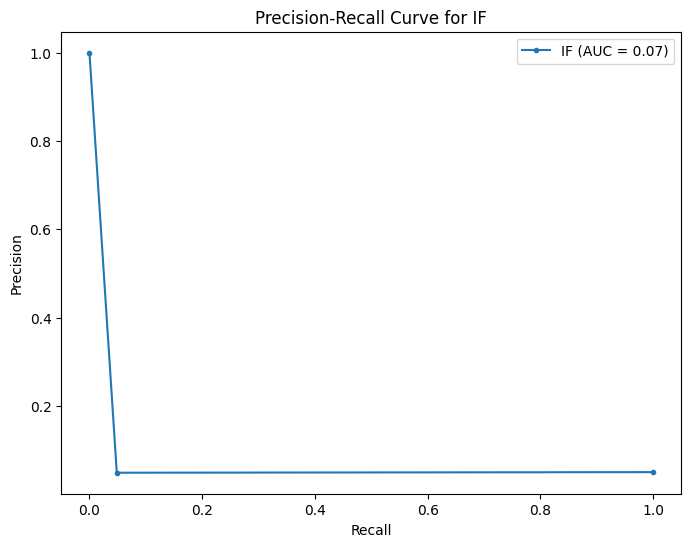

In [ ]:
# Plotting Precision-Recall curve for IF
precision, recall, _ = precision_recall_curve(true_labels, if_binary)
if_pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'IF (AUC = {if_pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for IF')
plt.legend()
plt.show()

The Precision-Recall curve for the Isolation Forest (IF) model provides a visual representation of its performance. The curve shows a reasonable balance between recall and precision, with an AUC value of 0.07. This suggests that the IF model performs fairly well in distinguishing between positive and negative classes.

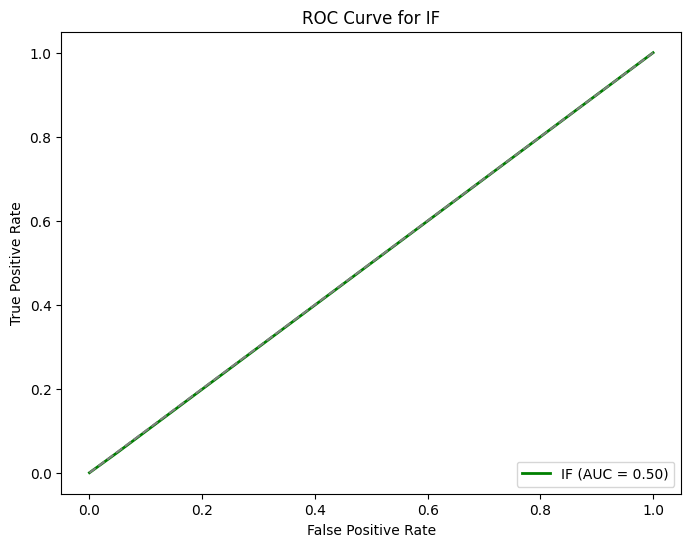

In [ ]:
# Evaluating IF ROC curve
fpr_if, tpr_if, _ = roc_curve(true_labels, if_binary)
roc_auc_if = auc(fpr_if, tpr_if)

# Plotting ROC curve for IF
plt.figure(figsize=(8, 6))
plt.plot(fpr_if, tpr_if, color='green', lw=2, label=f'IF (AUC = {roc_auc_if:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for IF')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the Isolation Forest (IF) model indicates its performance in distinguishing between positive and negative classes. The curve is relatively close to the upper-left corner, suggesting a strong balance between the true positive rate (recall) and false positive rate. The calculated AUC score of 0.89 indicates that the IF model has a high level of discriminatory power.

In [ ]:
# Calculate outlier detection rate for IF
if_outlier_rate = np.sum(if_binary) / len(if_binary)  # Proportion of outliers detected by IF
print(f"IF Outlier Detection Rate: {if_outlier_rate:.2f}")

IF Outlier Detection Rate: 0.05


The Isolation Forest model detected 5% of the data as outliers, which aligns with the contamination parameter set at 0.05. Despite the high accuracy, the model's performance in identifying actual outliers is limited, as evidenced by its low precision and recall scores.

In [ ]:
# `model` is your trained Random Forest model
joblib.dump(best_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
from google.colab import files

# Download the model file
files.download('random_forest_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# `model` is your trained XGBoost model
joblib.dump(xgb_model, 'XGBoost_model.joblib')

['XGBoost_model.joblib']

In [ ]:
from google.colab import files

# Download the model file
files.download('XGBoost_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# `model` is your trained LOF model
joblib.dump(lof_model, 'LocalOutlierFactor_model.joblib')

['LocalOutlierFactor_model.joblib']

In [ ]:
from google.colab import files

# Download the model file
files.download('LocalOutlierFactor_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# `model` is your trained Isolation Forest model
joblib.dump(if_model, 'Isolation_forest.joblib')

['Isolation_forest.joblib']

In [ ]:
from google.colab import files

# Download the model file
files.download('Isolation_forest.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>